In [76]:
import numpy as np
import pandas as pd                                  # for data wrangling and analysis
import mglearn

import sklearn as sk                                 # for machine learning
from sklearn.model_selection import train_test_split # split data into 75% training & 25% test sets
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colormaps
# list(colormaps)

**1. Wave dataset**

Text(0, 0.5, 'y (target)')

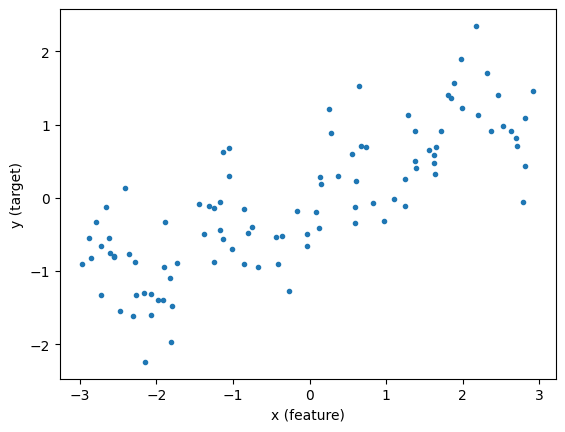

In [77]:
X_wave, y_wave = mglearn.datasets.make_wave()
wave_df = pd.DataFrame(X_wave, columns=['X'])
wave_df = wave_df.assign(y = y_wave)

plt.scatter(wave_df['X'], wave_df['y'], marker = '.')
plt.xlabel('x (feature)')
plt.ylabel('y (target)')

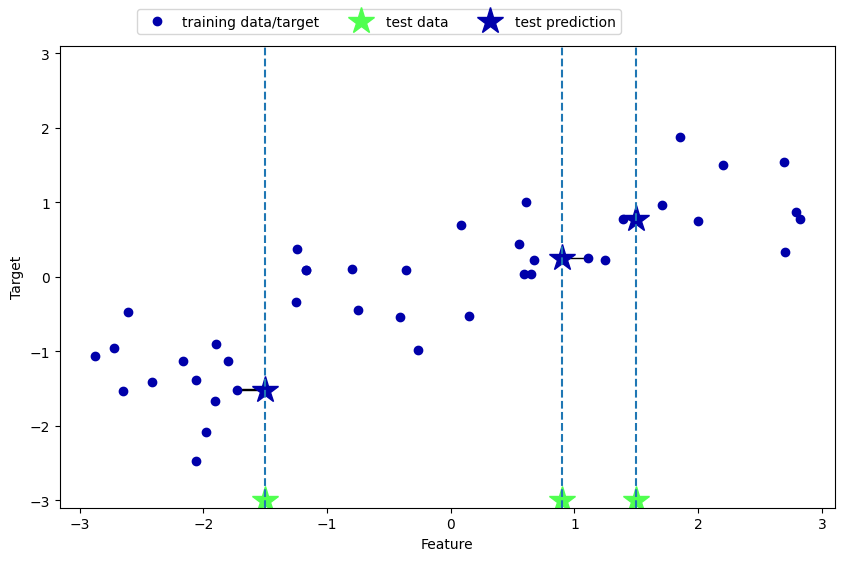

In [78]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

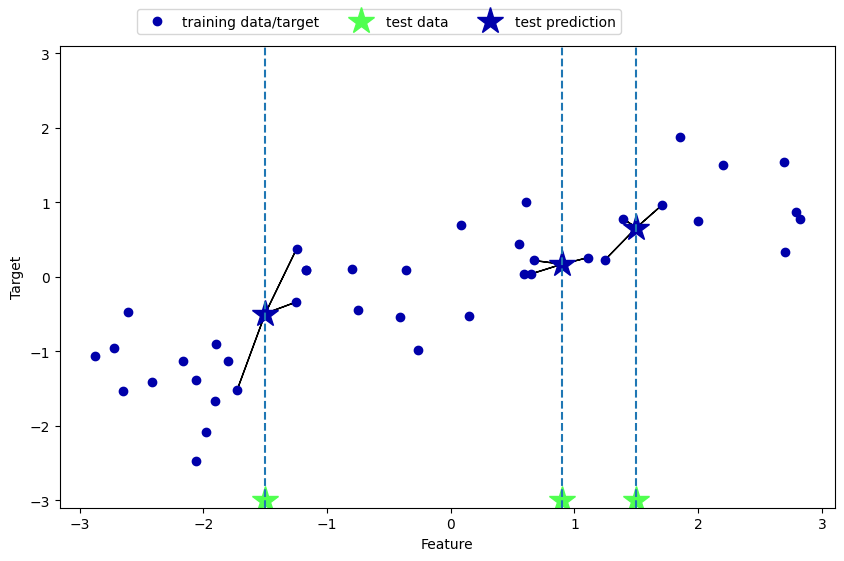

In [79]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [80]:
X_wave_train, X_wave_test, y_wave_train, y_wave_test = train_test_split(X_wave, y_wave, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3) # instantiate the model
reg.fit(X_wave_train, y_wave_train)      # fit the model using the training data and training targets

forge_pred = pd.DataFrame(X_wave_test, columns= ['X'])
forge_pred = forge_pred.assign(y = y_wave_test,
                               y_pred = reg.predict(X_wave_test))

print('Test set R^2 (coefficient of determination) is {}'.format(reg.score(X_wave_test, y_wave_test)), '(a relatively good model fit)')

Test set R^2 (coefficient of determination) is 0.6706208209942042 (a relatively good model fit)


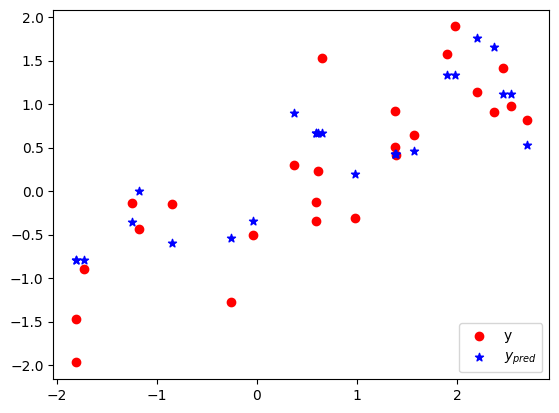

In [81]:
plt.scatter(forge_pred['X'], forge_pred['y'], marker='o', c='r', label='y')
plt.scatter(forge_pred['X'], forge_pred['y_pred'], marker='*', c='b', label='$y_{pred}$')
plt.legend(loc='lower right')
plt.show()

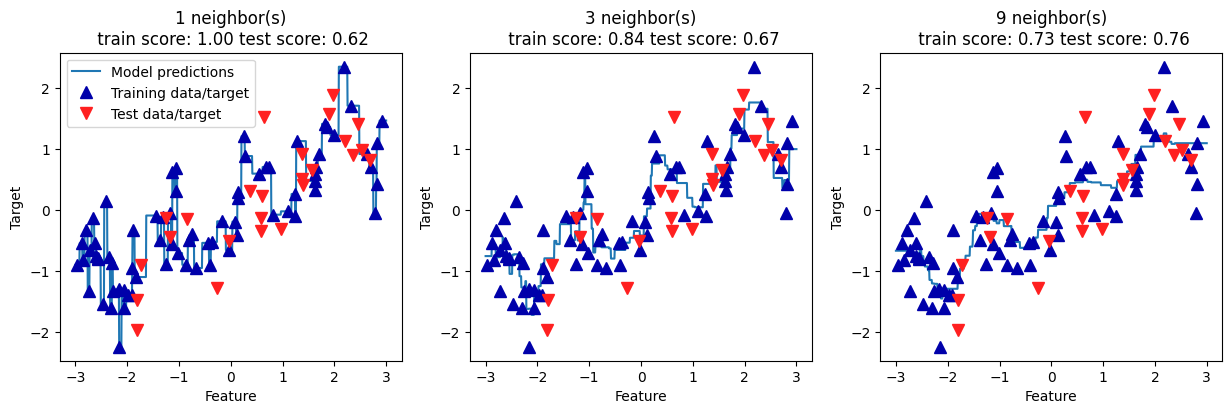

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # create 1,000 data points, evenly spaced between -3 and 3

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_wave_train, y_wave_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_wave_train, y_wave_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_wave_test, y_wave_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_wave_train, y_wave_train), reg.score(X_wave_test, y_wave_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")


**2. Breast cancer**

In [83]:
from sklearn.datasets import load_breast_cancer
cancer_df = load_breast_cancer()
print('Cancer dataset keys: {}'.format(cancer_df.keys()))

cancer = pd.DataFrame(cancer_df['data'], columns = cancer_df['feature_names'])
cancer = cancer.assign(y = cancer_df['target'])
cancer['outcome'] = cancer['y'].map({1:'malignant', 0:'benign'})
print("Sample counts per class:{}".format({n: v for n, v in zip(cancer['outcome'], np.bincount(cancer['y']))}))

display(cancer.iloc[:5])

Cancer dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Sample counts per class:{'benign': 357}


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,benign


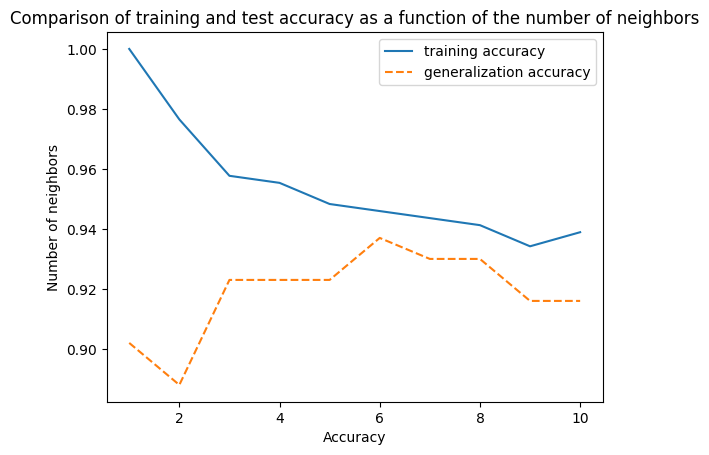

In [84]:
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(cancer_df['data'], cancer_df['target'], random_state=66, stratify=cancer_df['target'])

train_accuracy = [] # training accuracy
test_accuracy = []  # test (generalization) accuracy
num_neighbors = range(1, 11) # between 1 and 10

for neighbors in num_neighbors:
    clf = KNeighborsClassifier(n_neighbors=neighbors)
    clf.fit(X_cancer_train, y_cancer_train)
    train_accuracy.append(clf.score(X_cancer_train, y_cancer_train))
    test_accuracy.append(clf.score(X_cancer_test, y_cancer_test))

plt.plot(num_neighbors, train_accuracy, label = 'training accuracy')
plt.plot(num_neighbors, test_accuracy, label = 'generalization accuracy', linestyle = 'dashed')
plt.xlabel('Accuracy')
plt.ylabel('Number of neighbors')
plt.title('Comparison of training and test accuracy as a function of the number of neighbors')
plt.legend()

**3. Forge dataset**

In [85]:
X_forge, y_forge = mglearn.datasets.make_forge()

forge_df = pd.DataFrame(X_forge, columns= ['x1', 'x2'])
forge_df = forge_df.assign(y = y_forge)
print("Forge dataset dimension: {}".format(forge_df.shape)) # 2 features and 26 obs

display(forge_df.iloc[:5])
display(forge_df.tail(5))

Forge dataset dimension: (26, 3)


,x1,x2,y
0,9.963466,4.596765,1
1,11.032954,-0.168167,0
2,11.541558,5.211161,1
3,8.692890,1.543220,0
4,8.106227,4.286960,0


,x1,x2,y
21,9.500490,-0.264303,0
22,8.344688,1.638243,0
23,9.501693,1.938246,0
24,9.150723,5.498322,1
25,11.563957,1.338940,0


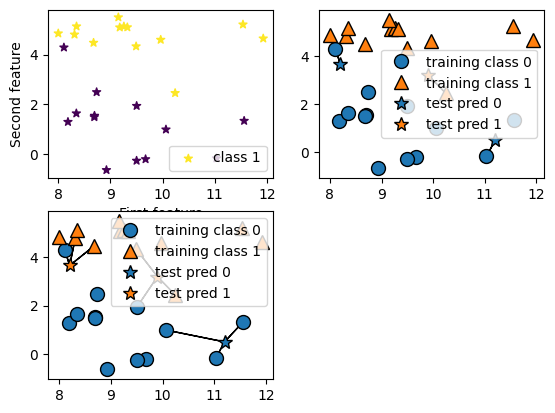

In [86]:
plt.subplot(2, 2, 1)
plt.scatter(forge_df['x1'], forge_df['x2'], c=forge_df['y'], marker= '*')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.legend(['class 1', 'class 0'], loc="lower right")

plt.subplot(2, 2, 2)
mglearn.plots.plot_knn_classification(n_neighbors=1)

plt.subplot(2, 2, 3)
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [87]:
X_forge_train, X_forge_test, y_forge_train, y_forge_test = train_test_split(X_forge, y_forge, random_state=0)

clf = KNeighborsClassifier(n_neighbors=3) # import and instantiate the class
clf.fit(X_forge_train, y_forge_train)     # fit the classifier using the training set

forge_pred = pd.DataFrame(X_forge_test, columns= ['x1', 'x2'])
forge_pred = forge_pred.assign(y_test = y_forge_test,
                               y_pred = clf.predict(X_forge_test))
display(forge_pred)

,x1,x2,y_test,y_pred
0,11.541558,5.211161,1,1
1,10.063938,0.990781,0,0
2,9.491235,4.332248,1,1
3,8.183781,1.295642,0,0
4,8.309889,4.806240,1,1
5,10.240289,2.455444,1,0
6,8.344688,1.638243,0,0


In [88]:
print("Test set accuracy: {:.2f}".format(clf.score(X_forge_test, y_forge_test)))

Test set accuracy: 0.86


**Decision boundary**

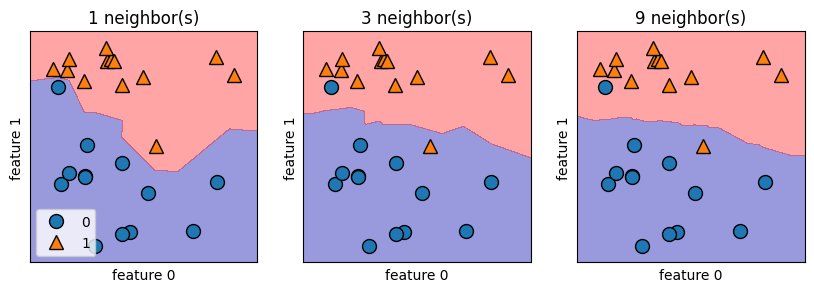

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_forge, y_forge)
    mglearn.plots.plot_2d_separator(clf, X_forge, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X_forge[:, 0], X_forge[:, 1], y_forge, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

**4. Boston Housing dataset**

*<u> Goal </u>: We will not only consider crime rate and highway accessibility as features, but also the product of crime rate and highway accessibility.*

https://fairlearn.org/main/user_guide/datasets/boston_housing_data.html

https://www.geeksforgeeks.org/ml-boston-housing-kaggle-challenge-with-linear-regression/

In [99]:
from fairlearn.datasets import fetch_boston

X, y = fetch_boston(return_X_y = True)
boston = pd.concat([X, y], axis=1) # concatenate pandas objects along colume
print('Data shape:{}'.format(boston.shape))

Data shape:(506, 14)


C:\Users\pquyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fairlearn\datasets\_fetch_boston.py:135: DataFairnessWarning: You are about to use a dataset with known fairness issues.
  warnings.warn(DataFairnessWarning(msg))


In [98]:
boston.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32)

**5. Iris dataset**

*<ins>Goals</ins>: To build a machine learning model that can learn from the measurements of these irises whose species is known, so that we can predict the species for a new
iris.*

In [90]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("Keys of iris_dataset: {}".format(iris_dataset.keys()))   
print("Target names: {}".format(iris_dataset['target_names']))   # 3 classes of species
print("Feature names: {}".format(iris_dataset['feature_names']))
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("Type of target: {}".format(type(iris_dataset['target']))) # target is a one-dimensional array, with one entry per 
                                                                 # flower
print("Target:\n{}".format(iris_dataset['target']))
# print(iris_dataset['DESCR'] + "\n...")                         # short description of dataset

Keys of iris_dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
Type of target: <class 'numpy.ndarray'>
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [91]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=100)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


The three classes seem to be relatively well separated using the sepal and petal measurements.

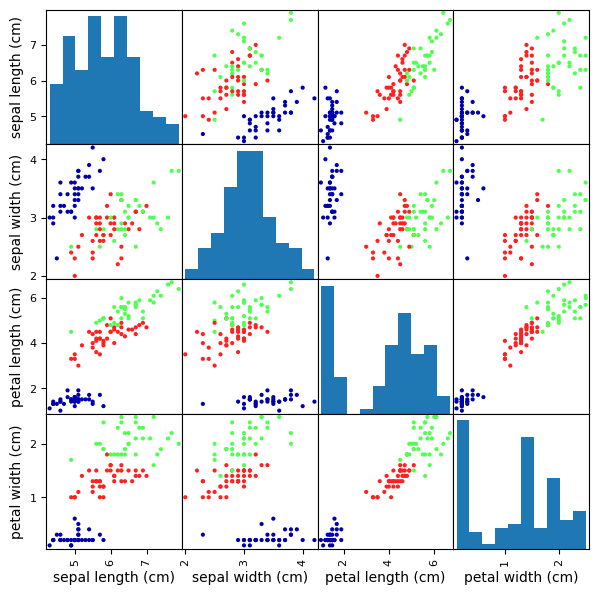

In [92]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset['feature_names'] )

grr = pd.plotting.scatter_matrix(iris_df, 
                                 alpha = 1,          # amount of transparency
                                 figsize = (7, 7),
                                 marker = '.',
                                 c = y_train,        # color by types of iris species
                                 cmap = mglearn.cm3) # colormap

For this model, the test set accuracy is about 0.97, which means we made the right prediction for 97% of the irises in the test set. Under some mathematical assumptions, we can expect our model to be correct 97% of the time for new irises.

In [93]:
knn = KNeighborsClassifier(n_neighbors=1) # number of neighbors to use by default for kneighbors queries.
knn.fit(X_train, y_train)

# Prediction

X_new = np.array([[5, 2.9, 1, 0.2]])
y_predicted = knn.predict(X_new)
print("The predicted (numeric) output is {0}, so the target name is {1}".format(y_predicted, 
                                                                                iris_dataset['target_names'][y_predicted]))

# Evaluating the Model

y_test_predicted = knn.predict(X_test)
test_set_prediction = pd.DataFrame(X_test, columns = iris_dataset['feature_names'])
test_set_prediction = test_set_prediction.assign(y_test = y_test,
                                                 y_test_predicted = y_test_predicted)
test_set_prediction['dummy'] = np.where(test_set_prediction['y_test'] != test_set_prediction['y_test_predicted'], 1, 0)

print("Test set score (the fraction that species were correctly predicted): {:.2f}".format(np.mean(y_test_predicted == y_test))) 
print("Test set score (the score method of knn): {:.2f}".format(knn.score(X_test, y_test))) # return the mean accuracy

display(test_set_prediction)

The predicted (numeric) output is [0], so the target name is ['setosa']
Test set score (the fraction that species were correctly predicted): 0.97
Test set score (the score method of knn): 0.97


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_test,y_test_predicted,dummy
0,6.4,2.8,5.6,2.1,2,2,0
1,4.8,3.4,1.6,0.2,0,0,0
2,7.7,2.6,6.9,2.3,2,2,0
3,5.7,4.4,1.5,0.4,0,0,0
4,6.3,2.7,4.9,1.8,2,2,0
5,7.7,3.0,6.1,2.3,2,2,0
6,5.2,4.1,1.5,0.1,0,0,0
7,4.9,3.0,1.4,0.2,0,0,0
8,6.5,3.0,5.5,1.8,2,2,0
9,4.8,3.0,1.4,0.3,0,0,0
